In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
data = data.fillna(0)

In [6]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [24]:
numerical = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
]

categorical = ['ocean_proximity']

In [7]:
data['rooms_per_household'] = data['total_rooms'] / data['households']

In [8]:
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']

In [9]:
data['population_per_household'] = data['population'] / data['households']

In [10]:
data.mode()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-118.31,34.06,52.0,1527.0,0.0,891.0,306.0,3.1250,500001.0,<1H OCEAN,5.0,0.0,3.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0001,NaN,NaN,NaN,NaN,NaN


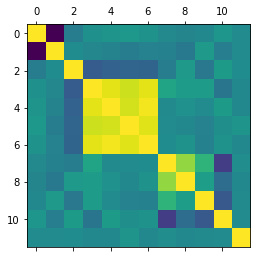

In [11]:
plt.matshow(data.corr())
plt.show()

In [12]:
m_1 = np.corrcoef(data['total_bedrooms'], data['households'])
m_2 = np.corrcoef(data['total_bedrooms'], data['total_rooms'])
m_3 = np.corrcoef(data['population'], data['households'])
m_4 = np.corrcoef(data['population_per_household'], data['total_rooms'])

In [13]:
print(m_1)

[[1.         0.96650724]
 [0.96650724 1.        ]]


In [14]:
print(m_2)

[[1.         0.92019617]
 [0.92019617 1.        ]]


In [15]:
print(m_3)

[[1.         0.90722227]
 [0.90722227 1.        ]]


In [16]:
print(m_4)

[[ 1.         -0.02458066]
 [-0.02458066  1.        ]]


In [17]:
# if (data['median_house_value'] > data['median_house_value'].mean()):
#     above_average = 1
# else:
#     above_average = 0

In [18]:
data['above_average'] = (data['median_house_value'] > data['median_house_value'].mean()).astype(int)

In [19]:
X = data.drop(['median_house_value'], axis=1)
y = data[['median_house_value']]

print(type(X))
print(type(y))
print(X.columns)
print(y.columns)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'above_average'],
      dtype='object')
Index(['median_house_value'], dtype='object')


In [20]:
data_full_train, data_test = train_test_split(data, test_size=0.2, random_state=1)
data_train, data_val = train_test_split (data_full_train, test_size=0.25, random_state=1)
y_train = data_train.median_house_value.values
y_val = data_val.median_house_value.values
y_test = data_test.median_house_value.values
y_full_train = data_full_train.median_house_value.values

round(mutual_info_score(data_train.median_house_value, data_train.ocean_proximity),2)

0.58

In [22]:
del data_train['median_house_value']
del data_val['median_house_value']
del data_test['median_house_value']
del data_full_train ['median_house_value']

In [28]:
dv = DictVectorizer(sparse=False)

train_dicts = (data_train[categorical + numerical]).to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [30]:
val_dicts = (data_val[categorical + numerical]).to_dict(orient='records')

X_val = dv.transform(val_dicts)

In [36]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

In [ ]:
y_pred = (model.predict_proba(X_val)[:,1]).astype(int)

round((y_val == y_pred).mean(),2)

0.0

In [ ]:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
accuracy

0.0

In [34]:
orig_score = accuracy
for c in features:
    subset = features.copy()
    subset.remove(c)
    train_dict = df_train[subset].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_pred =model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    print(c, abs(orig_score-score), score)

NameError: name 'features' is not defined